In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/densenet-keras/DenseNet-BC-121-32.h5
/kaggle/input/densenet-keras/DenseNet-BC-121-32-no-top.h5
/kaggle/input/densenet-keras/DenseNet-BC-161-48-no-top.h5
/kaggle/input/densenet-keras/DenseNet-BC-169-32.h5
/kaggle/input/densenet-keras/DenseNet-BC-161-48.h5
/kaggle/input/densenet-keras/DenseNet-BC-169-32-no-top.h5
/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/train_images/ef476be214d4.png
/kaggle/input/aptos2019-blindness-detection/train_images/6dcde47060f9.png
/kaggle/input/aptos2019-blindness-detection/train_images/ec363f48867b.png
/kaggle/input/aptos2019-blindness-detection/train_images/17f6c7072f61.png
/kaggle/input/aptos2019-blindness-detection/train_images/b49b2fac2514.png
/kaggle/input/aptos2019-blindness-detection/train_images/af6166d57f13.png
/kaggle/input/aptos2019-blindness-detection/train_images

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input/aptos2019-blindness-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import random

/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/train_images/ef476be214d4.png
/kaggle/input/aptos2019-blindness-detection/train_images/6dcde47060f9.png
/kaggle/input/aptos2019-blindness-detection/train_images/ec363f48867b.png
/kaggle/input/aptos2019-blindness-detection/train_images/17f6c7072f61.png
/kaggle/input/aptos2019-blindness-detection/train_images/b49b2fac2514.png
/kaggle/input/aptos2019-blindness-detection/train_images/af6166d57f13.png
/kaggle/input/aptos2019-blindness-detection/train_images/8d13c46e7d75.png
/kaggle/input/aptos2019-blindness-detection/train_images/c3b15bf9b4bc.png
/kaggle/input/aptos2019-blindness-detection/train_images/be68322c7223.png
/kaggle/input/aptos2019-blindness-detection/train_images/88e4399d207c.png
/kaggle/input/aptos2019-blindness-detection/train_images/0243404e8a00.png
/kaggle/input

In [3]:
# Necessary utility modules and libraries
import os
import shutil
import random
import cv2

# Plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import gaussian, convolve2d
import seaborn as sns

# Libraries for building the model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers
from tensorflow.keras.applications import DenseNet121, ResNet50, InceptionV3, EfficientNetB7, EfficientNetB0, DenseNet169
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2, l1
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

In [5]:
dir_path = '/kaggle/input/aptos2019-blindness-detection'
os.listdir(dir_path)

['sample_submission.csv',
 'train_images',
 'train.csv',
 'test.csv',
 'test_images']

In [6]:
df_train = pd.read_csv("/kaggle/input/aptos2019-blindness-detection/train.csv").sample(frac=1, random_state=42)
df_test = pd.read_csv("/kaggle/input/aptos2019-blindness-detection/test.csv").sample(frac=1, random_state=42)

In [7]:
len(df_train), len(df_test)

(3662, 1928)

In [8]:
df_train.sample(5)

,id_code,diagnosis
756,362c4a96cebb,2
2996,d0926ed2c8e5,0
2799,c1896142a20a,4
67,052d9a3fe55a,2
812,3a6e9730b298,4


In [9]:
df_train['diagnosis'].value_counts()

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64

In [10]:
class_code = {0: "No_DR",
              1: "Mild",
              2: "Moderate",
              3: "Severe",
              4: "Proliferate_DR"}

In [11]:
def mapping_temp(df, root=dir_path):
    df['label'] = list(map(class_code.get, df['diagnosis']))
    df['path'] = [i[1]['label']+'/'+i[1]['id_code']+'.png' for i in df.iterrows()]
    return df

df_train = mapping_temp(df_train)
df_train

,id_code,diagnosis,label,path
2059,90960ddf4d14,0,No_DR,No_DR/90960ddf4d14.png
1105,4e0656629d02,1,Mild,Mild/4e0656629d02.png
818,3b018e8b7303,3,Severe,Severe/3b018e8b7303.png
1237,55eb405ec71e,4,Proliferate_DR,Proliferate_DR/55eb405ec71e.png
463,207dd0487264,0,No_DR,No_DR/207dd0487264.png
...,...,...,...,...
1130,4f6abc40c72d,0,No_DR,No_DR/4f6abc40c72d.png
1294,5a091e8cd95c,1,Mild,Mild/5a091e8cd95c.png
860,3dfc50108072,2,Moderate,Moderate/3dfc50108072.png
3507,f47a2a4a0411,1,Mild,Mild/f47a2a4a0411.png


In [12]:
# Dropping the diagnosis column because the model assigns different codes for prediction
df_train.drop(['diagnosis'], axis=1, inplace=True)

In [13]:
df_train['label'].value_counts()

label
No_DR             1805
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: count, dtype: int64

In [14]:
import os
import shutil

input_folder = '/kaggle/input/train-images/aadi_preprocess'
output_folder = '/kaggle/working/new_train_images/'

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        # Extract the random ID from the filename
        random_id = filename.split('_')[-1][:-4]  # Extracting the ID from 'preprocessed_somerandomid.png'
        
        # Create the new filename
        new_filename = f'{random_id}.png'
        
        # Rename the file and move it to the output directory
        shutil.copy(os.path.join(input_folder, filename), os.path.join(output_folder, new_filename))


In [ ]:
#random_img = random.sample(os.listdir(dir_path+'/train_images'), 1)[0]
#random_img_path = dir_path+'/train_images/'+random_img
#image = cv2.imread(random_img_path)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#pro = image_preprocessing(image)
#filename = os.path.basename(random_img_path)
#print(df_train[df_train['id_code']==random_img[:-4]]['label'])

In [15]:
for i in range(5):
  os.mkdir('./'+class_code[i])

In [16]:
df_train['label'].value_counts()

label
No_DR             1805
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: count, dtype: int64

In [17]:
import os
import shutil
import cv2

res = [[i[1][1], i[1][2]] for i in df_train.iterrows()]

for i in res:
    filename = i[1].split('/')[1]
    src = os.path.join('/kaggle/working/new_train_images', filename)
    des = os.path.join('./' + i[0] + '/', filename)
    img = cv2.imread(src)

    # Check if the image is not None before processing and saving
    if img is not None:
        
        cv2.imwrite(des, img)
        print(f"Processed and saved: {des}")
    else:
        print(f"Skipping empty image: {src}")

/tmp/ipykernel_47/1933600150.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res = [[i[1][1], i[1][2]] for i in df_train.iterrows()]


Processed and saved: ./No_DR/90960ddf4d14.png
Processed and saved: ./Mild/4e0656629d02.png
Processed and saved: ./Severe/3b018e8b7303.png
Processed and saved: ./Proliferate_DR/55eb405ec71e.png
Processed and saved: ./No_DR/207dd0487264.png
Processed and saved: ./No_DR/1d74c4713e21.png
Processed and saved: ./No_DR/eb175669d789.png
Processed and saved: ./Proliferate_DR/b49b2fac2514.png
Processed and saved: ./Moderate/4a44cc840ebe.png
Processed and saved: ./Moderate/d6283ded6aea.png
Processed and saved: ./No_DR/29d059522fa1.png
Processed and saved: ./No_DR/3908b3cfd620.png
Processed and saved: ./Moderate/5486da4273d7.png
Processed and saved: ./Moderate/51d574513bcb.png
Processed and saved: ./Moderate/a47878630dc2.png
Processed and saved: ./No_DR/83517eaeccb9.png
Processed and saved: ./No_DR/e5f73f2855c0.png
Processed and saved: ./No_DR/63b71347e95d.png
Processed and saved: ./No_DR/e1b8acb1cea1.png
Processed and saved: ./No_DR/3f6bccf21ce8.png
Processed and saved: ./No_DR/b72f59b85f7c.png
P

In [18]:
# The model assigns labels in ascending order
classes = sorted(classes)
classes

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [19]:
# Initializing the input size
IMG_SHAPE = (224, 224)
EPOCHS = 50
BATCH_SIZE = 32

train_df, val_df = train_test_split(df_train, test_size=0.2, stratify=df_train['label'], random_state=42)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df, 
                                       x_col='path',
                                       y_col='label',
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,        
                                       target_size=IMG_SHAPE)

valid_data = valid_datagen.flow_from_dataframe(dataframe=val_df, 
                                       x_col='path',
                                       y_col='label',
                                       class_mode="categorical",
                                       batch_size=BATCH_SIZE,
                                       target_size=IMG_SHAPE)

Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [28]:
# Basic architecture of DenseNet
base_model_densenet=DenseNet121(weights='/kaggle/input/densenet-keras/DenseNet-BC-121-32-no-top.h5',include_top=False, input_shape=(224, 224, 3))
model_densenet=Sequential()
model_densenet.add(base_model_densenet)
model_densenet.add(layers.GlobalAveragePooling2D())
model_densenet.add(layers.Dense(64, kernel_regularizer='l2'))
model_densenet.add(layers.Dropout(0.2))
model_densenet.add(layers.Dense(5,activation='softmax'))
# Summary of the denseNet model
model_densenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 7103429 (27.10 MB)
Trainable params: 7019781 (26.78 MB)
Non-trainable params: 83648 (326.75 KB)
__________

In [29]:
def early_stopping(patience=5):
    return tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)

In [30]:
def model_checkpoint(name):
    return tf.keras.callbacks.ModelCheckpoint(f"{name}.h5", save_best_only=True)

In [31]:
model_densenet.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['acc'])

model_densenet_history = model_densenet.fit(train_data,
                                           validation_data=valid_data,
                                           steps_per_epoch=int(train_data.n//train_data.batch_size),
                                           epochs=20,
                                           validation_steps=int(valid_data.n//valid_data.batch_size),
                                           callbacks=[early_stopping(11), model_checkpoint("densenet_new_preprocess")])

Epoch 1/20
91/91 [==============================] - 126s 719ms/step - loss: 1.9801 - acc: 0.7018 - val_loss: 1.8295 - val_acc: 0.7145
Epoch 2/20
91/91 [==============================] - 64s 697ms/step - loss: 1.5534 - acc: 0.7749 - val_loss: 1.5584 - val_acc: 0.7670
Epoch 3/20
91/91 [==============================] - 68s 739ms/step - loss: 1.3396 - acc: 0.8105 - val_loss: 1.3769 - val_acc: 0.7912
Epoch 4/20
91/91 [==============================] - 64s 699ms/step - loss: 1.2116 - acc: 0.8271 - val_loss: 1.2710 - val_acc: 0.8082
Epoch 5/20
91/91 [==============================] - 63s 687ms/step - loss: 1.0926 - acc: 0.8474 - val_loss: 1.1876 - val_acc: 0.8111
Epoch 6/20
91/91 [==============================] - 62s 675ms/step - loss: 0.9635 - acc: 0.8799 - val_loss: 1.2290 - val_acc: 0.8068
Epoch 7/20
91/91 [==============================] - 62s 679ms/step - loss: 0.8886 - acc: 0.8875 - val_loss: 1.2198 - val_acc: 0.7841
Epoch 8/20
91/91 [==============================] - 62s 678ms/step -

In [36]:
y_preds_model_denseNet = make_predictions(model_densenet)
y_true = valid_data.classes
# Metrics for denseNet
metrics(y_true, y_preds_model_denseNet)

23/23 [==============================] - 9s 288ms/step


(            class  sensitivity  specificity
 0            Mild     0.905918     0.081081
 1        Moderate     0.733583     0.285000
 2           No_DR     0.448925     0.504155
 3  Proliferate_DR     0.916914     0.118644
 4          Severe     0.976945     0.000000,
 0.34379263301500684)

In [43]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Utility functions for evaluation

def cm(y_true, y_pred):
    classes.sort()
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = classes, 
                     columns = classes)
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

def metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    res = []
    for l in [0,1,2,3,4]:
        prec, recall, _, _ = precision_recall_fscore_support(np.array(y_true)==l,
                                                             np.array(y_pred)==l,
                                                             pos_label=True,
                                                             average=None)
        res.append([classes[l],recall[0],recall[1]])
    df_res = pd.DataFrame(res, columns=['class','sensitivity','specificity'])

    # Calculate ROC and AUC for the whole dataset
    y_true_categorical = tf.keras.utils.to_categorical(y_true, num_classes=len(classes))
    y_pred_categorical = tf.keras.utils.to_categorical(y_pred, num_classes=len(classes))
    plot_roc_curve(y_true_categorical, y_pred_categorical)

    return df_res, acc

def plot_roc_curve(y_true, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate ROC curve for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve((y_true[:, i] == 1).astype(int), (y_pred[:, i] == 1).astype(int))
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

def make_predictions(model_test):
    # Evaluate the model
    predictions = model_test.predict(valid_data, verbose=1)
    y_preds = np.argmax(predictions, axis=1)
    return y_preds

def plot_result(hist):
    plt.figure(figsize=(10, 5));
    plt.suptitle(f"Performance Metrics", fontsize=20)
    
    # Actual and validation losses
    plt.subplot(1, 2, 1);
    plt.plot(hist['loss'], label='train')
    plt.plot(hist['val_loss'], label='validation')
    plt.title('Train and val loss curve')
    plt.legend()

    # Actual and validation accuracy
    plt.subplot(1, 2, 2);
    plt.plot(hist['acc'], label='train')
    plt.plot(hist['val_acc'], label='validation')
    plt.title('Train and val accuracy curve')
    plt.legend()

# View random images in the dataset
def view_random_images(root_dir, classes=classes):
    class_paths = [root_dir + "/" + image_class for image_class in classes]
    images_path = []
    labels = []
    for i in range(len(class_paths)):
        random_images = random.sample(os.listdir(class_paths[i]), 10)
        random_images_path = [class_paths[i]+'/'+img for img in random_images]
        for j in random_images_path:
            images_path.append(j)
            labels.append(classes[i])

    plt.figure(figsize=(17, 10))
    plt.suptitle("Image Dataset", fontsize=20)

    for i in range(1, 51):
        plt.subplot(5, 10, i)
        img = mpimg.imread(images_path[i-1])
        plt.imshow(img, aspect="auto")
        plt.title(labels[i-1])
        plt.axis(False);


# Rest of your code for model training and evaluation...


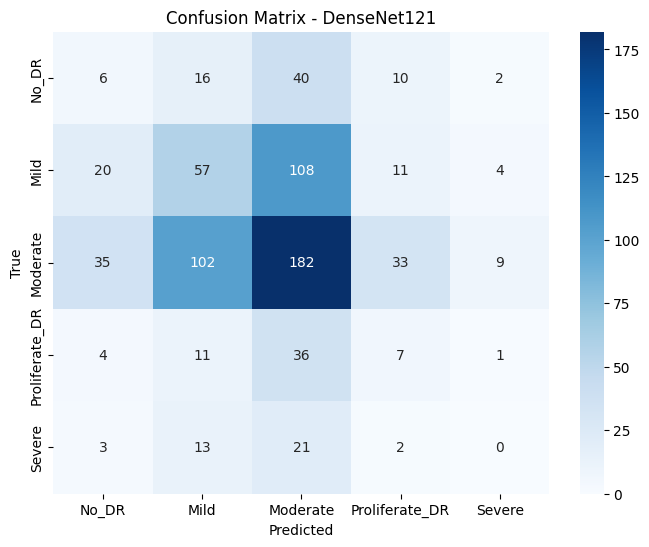

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true_vgg16 and y_preds_vgg16 are defined previously
conf_matrix_dense121 = confusion_matrix(y_true, y_preds_model_denseNet)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dense121, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No_DR', 'Mild', 'Moderate', 'Proliferate_DR', 'Severe'], 
            yticklabels=['No_DR', 'Mild', 'Moderate', 'Proliferate_DR', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - DenseNet121')
plt.show()

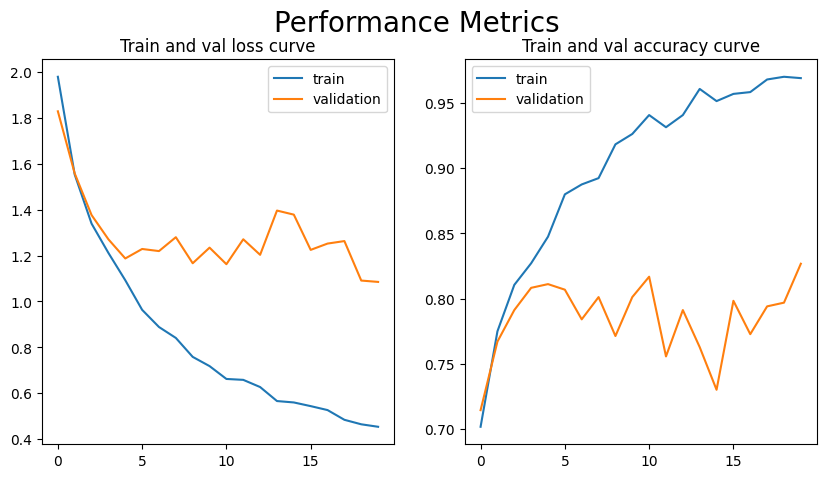

In [38]:
# Assuming you have a function `plot_result` defined
plot_result(model_densenet_history.history)

In [40]:
def visualize_conv_layer(model, layer_name):
    # Load an example image (you can replace this with your own image)
    image_path = '/kaggle/working/Mild/35aa7f5c2ec0.png'
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SHAPE)  # Adjust the target size
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    
    # Display the feature maps for each filter
    n_filters = intermediate_output.shape[-1]//4  # Number of filters in the layer

    plt.figure(figsize=(20, 20))
    
    if n_filters>256:
        n_filter=n_filters[:256]
    for i in range(n_filters):
        plt.subplot(16, 16, i + 1)  # Adjust the number of rows and columns as needed
        plt.imshow(intermediate_output[0, :, :, i], cmap='gray')  # Display one of the feature maps
        plt.axis('off')

    plt.show()

23/23 [==============================] - 7s 290ms/step


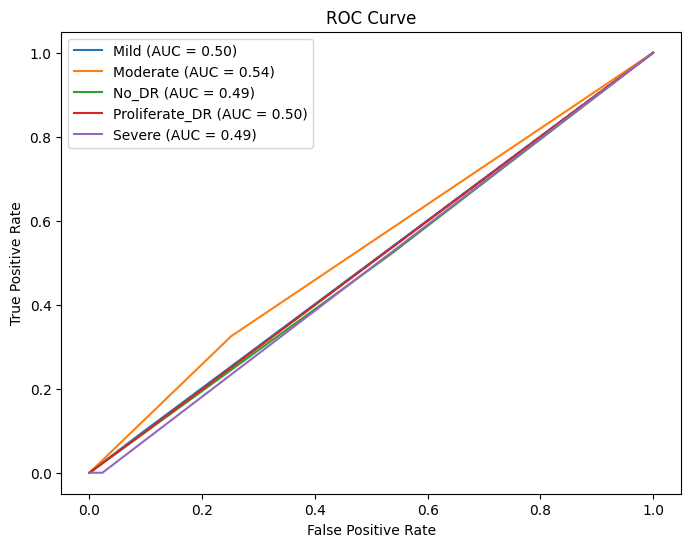

23/23 [==============================] - 6s 280ms/step


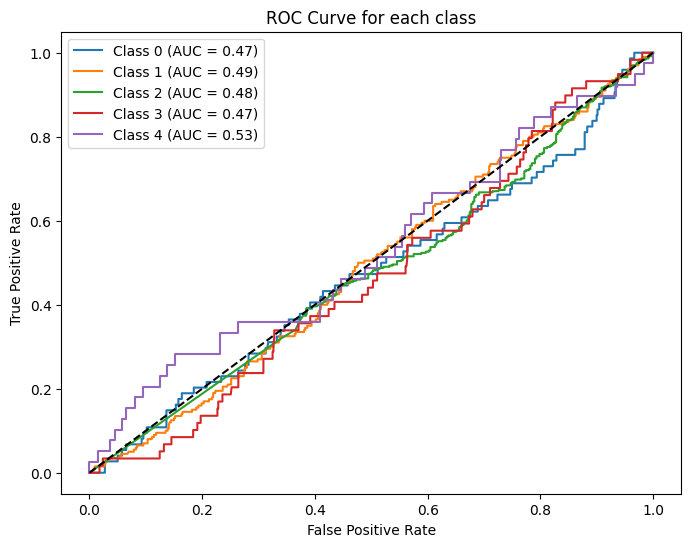

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ...

# Rest of your code for model training and evaluation...

# Obtain predictions for the validation set
y_preds_model_denseNet = make_predictions(model_densenet)
y_true = valid_data.classes

# Metrics for denseNet
metrics(y_true, y_preds_model_denseNet)

# Plot ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Obtain probabilities for each class
y_pred_probs = model_densenet.predict(valid_data)

# Convert true labels to one-hot encoded form
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=5)

# Calculate ROC curve and AUC for each class
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='best')
plt.show()
